In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl/dvcs/"
parent_bhMC = "/Volumes/Extreme SSD/Jan2022/convPkl/bh/"
parent_Gen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/dvcs/inb/"
parent_bhGen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/bh/inb/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

#epg Exp
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

#dvcs Rec
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4124_corr = pd.read_pickle(parent_MC + "4124.pkl")
df_4139_corr = pd.read_pickle(parent_MC + "4139.pkl")
df_4181_corr = pd.read_pickle(parent_MC + "4181.pkl")
df_4182_corr = pd.read_pickle(parent_MC + "4182.pkl")

#bkg1g Rec
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4202_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4202.pkl")
df_4209_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4209.pkl")
#bkg2g Rec
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
df_4202_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4202.pkl")
df_4209_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4209.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [5]:
epgExpInb = copy(exp_1g_corr)
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [6]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

In [7]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.config == 3)& (pi0ExpInb.Pp < 0.8)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.config == 3)& (pi0SimInb.Pp < 0.8)]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(pi0ExpInb.config == 2)& (pi0ExpInb.Pp < 0.8)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.config == 2)& (pi0SimInb.Pp < 0.8)]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(pi0ExpInb.config == 1)& (pi0ExpInb.Pp < 0.8)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.config == 1)& (pi0SimInb.Pp < 0.8)]

In [72]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [73]:
print(contInbFD, contInbCD, contInbCDFT)

0.3573346763526741 0.09433758228353091 0.0027568456359141724


In [10]:
print(len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT))

42175 94489 94475


In [11]:
print(len(pi0ExpInbFD), len(pi0ExpInbCD), len(pi0ExpInbCDFT))

24085 25110 3131


In [61]:
def smearingDVCS4(df_epg, sigma = 0, sigma2 = 0, sigma3 = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector<7, 'Pp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Pp']
    df_epg.loc[df_epg.Psector<7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector<7, 'Pp']**2+M**2)
    df_epg.loc[df_epg.Psector<7, 'Ptheta'] = np.random.normal(1, sigma2, len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Ptheta']
    df_epg.loc[df_epg.Psector>7, 'Pphi'] = np.random.normal(1, np.abs(sigma3/np.sin(np.radians(df_epg.loc[:, "Ptheta"]))), len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Pphi']
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg

In [62]:
epgExpInbFD = epgExpInbFD.loc[epgExpInbFD.Psector != epgExpInbFD.Gsector]

coneAngle 31.207483149485753
reconGam 0.6096407243333453
coplanarity 3.781281248162479
ME_epg 0.19900265077302617
MM2_epg -0.0015978418928304094
MM2_eg 1.1189523520455738
MM2_ep 0.005079706628348822
MPt 0.09413655975354014


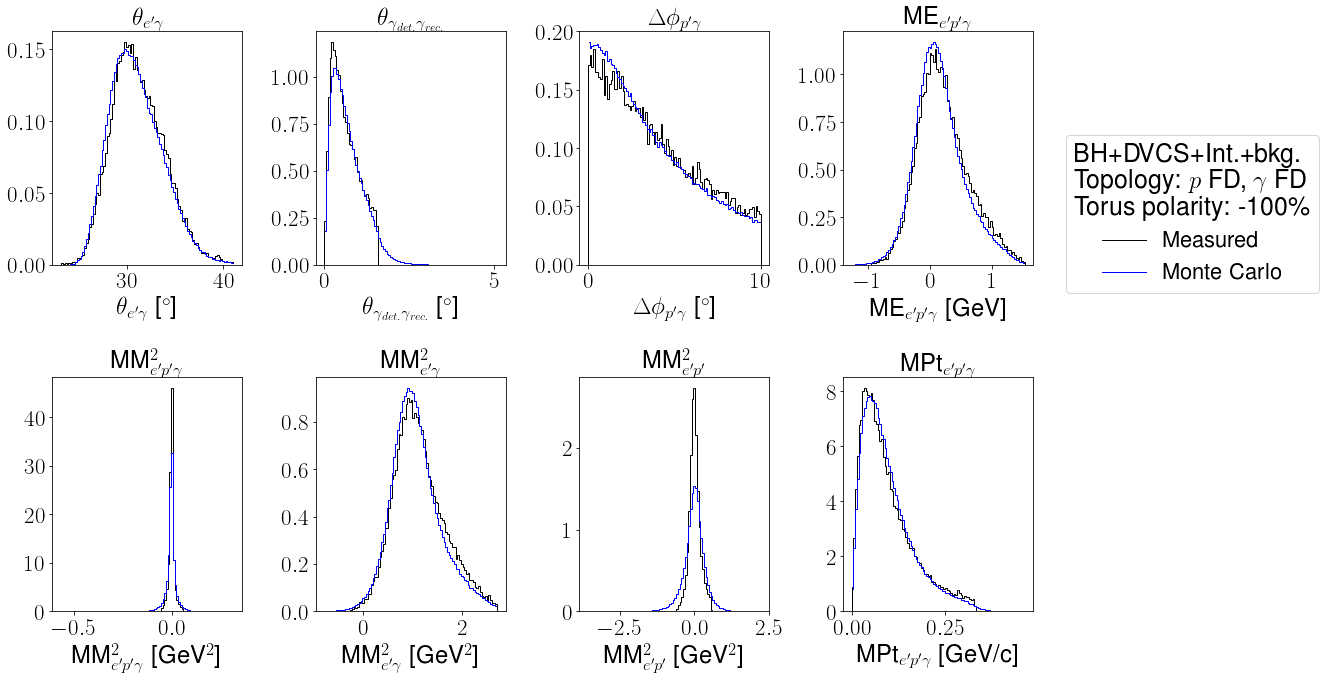

<Figure size 432x288 with 0 Axes>

In [67]:
df2 = smearingDVCS4(bkgSimInbFD, 0, 0.14, 0)
df1 = smearingDVCS4(dvcsSimInbFD, 0, 0.14, 0)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
        simDist = (1-contInbFD)*simDist_dvcs + contInbFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

<AxesSubplot:>

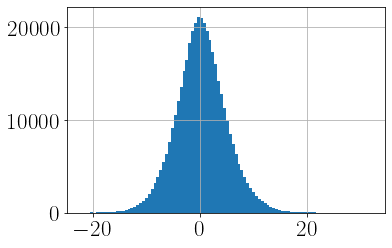

In [70]:
(df1.Ptheta - df1.GenPtheta).hist(bins = 100)

coneAngle 23.0629989501853
reconGam 0.3180235709164624
coplanarity 2.3271267930413484
ME_epg 0.05020828415676055
MM2_epg -0.0012193994993130455
MM2_eg 0.957842084791378
MM2_ep 0.006081854604375579
MPt 0.05154780946967713


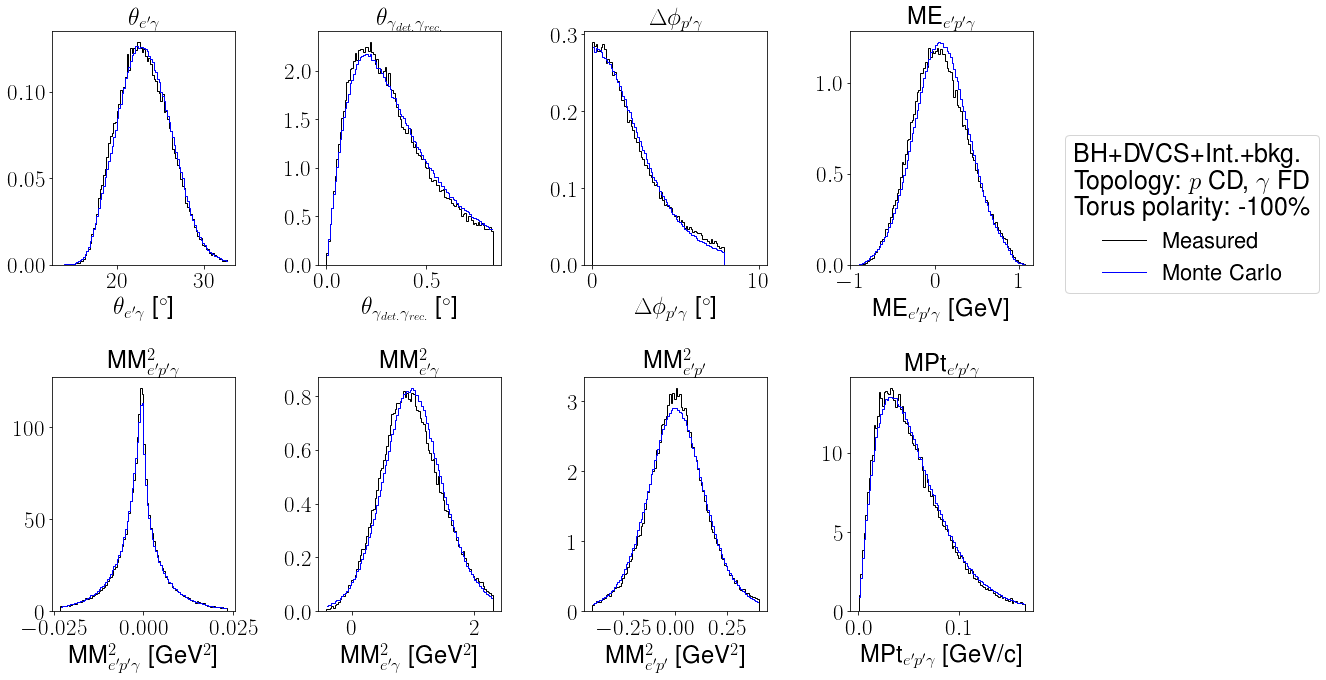

<Figure size 432x288 with 0 Axes>

In [69]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

coneAngle 21.858172308460006
reconGam 0.26686655634731365
coplanarity 2.2599973556256208
ME_epg 0.03547088204312277
MM2_epg -0.0015736697898309589
MM2_eg 0.9471973544088075
MM2_ep 0.0359728235235422
MPt 0.035030679330427784


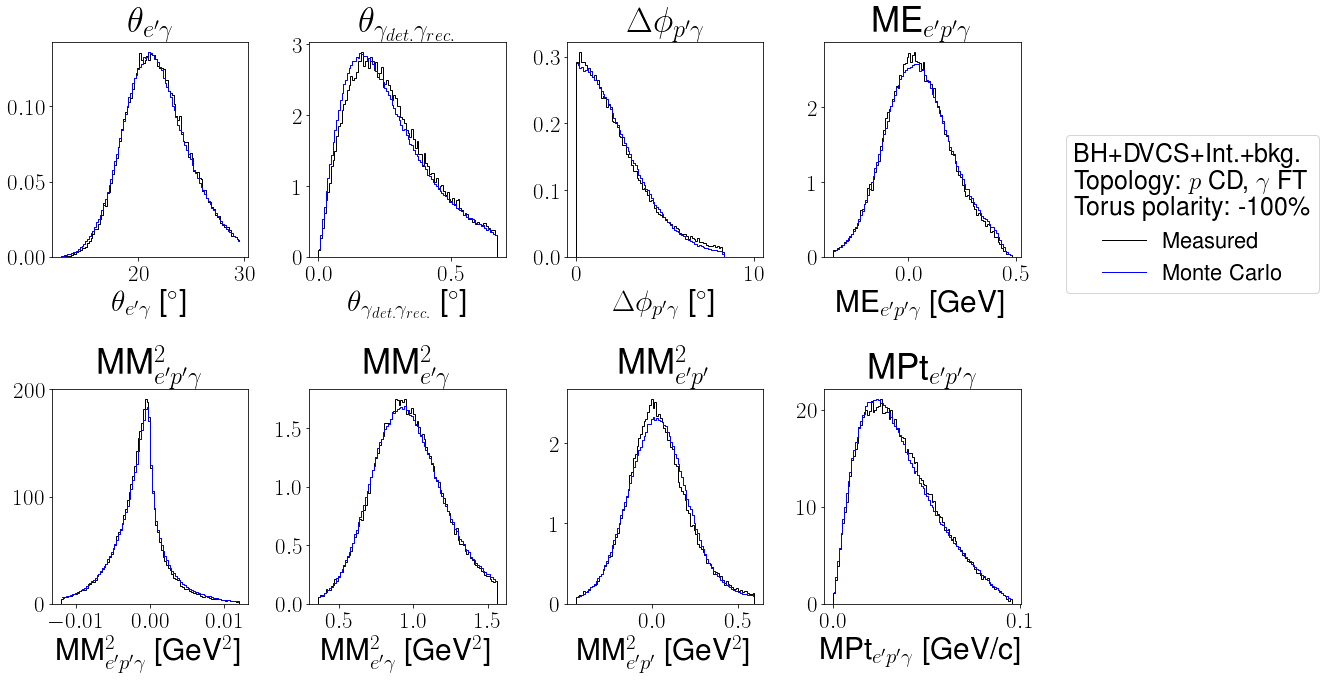

<Figure size 648x432 with 0 Axes>

In [130]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

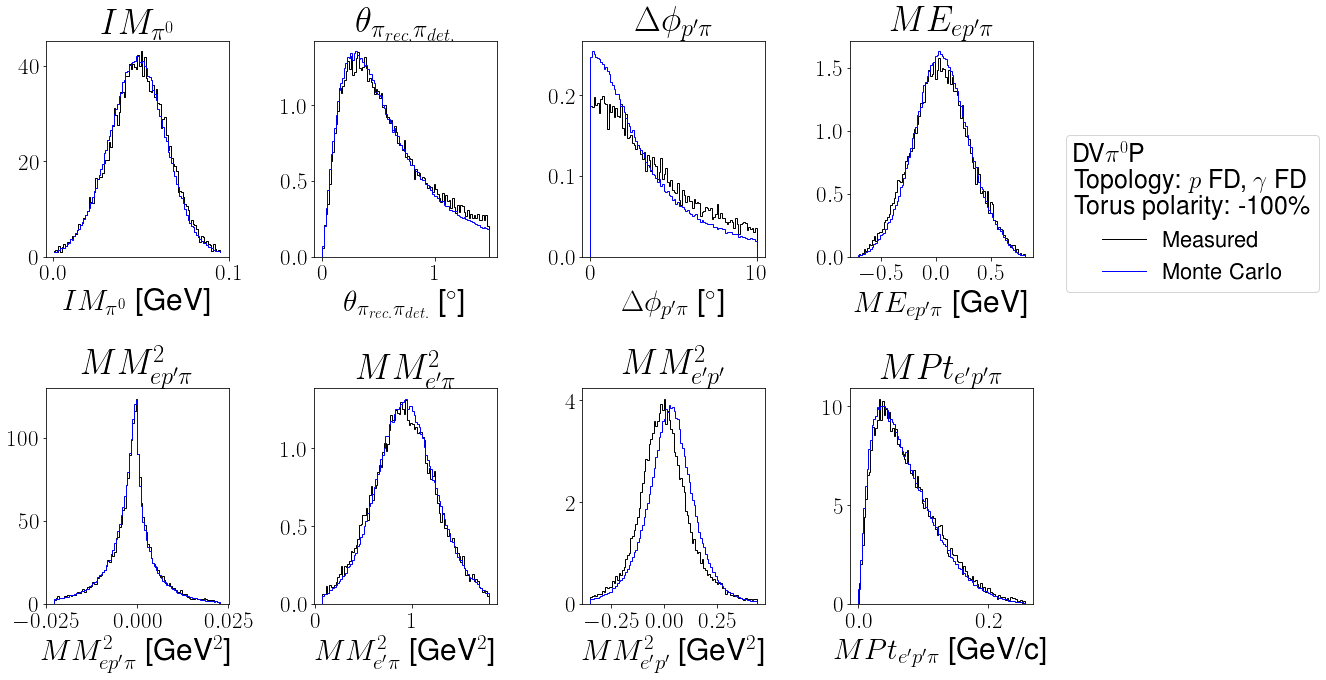

In [93]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbFD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbFD[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

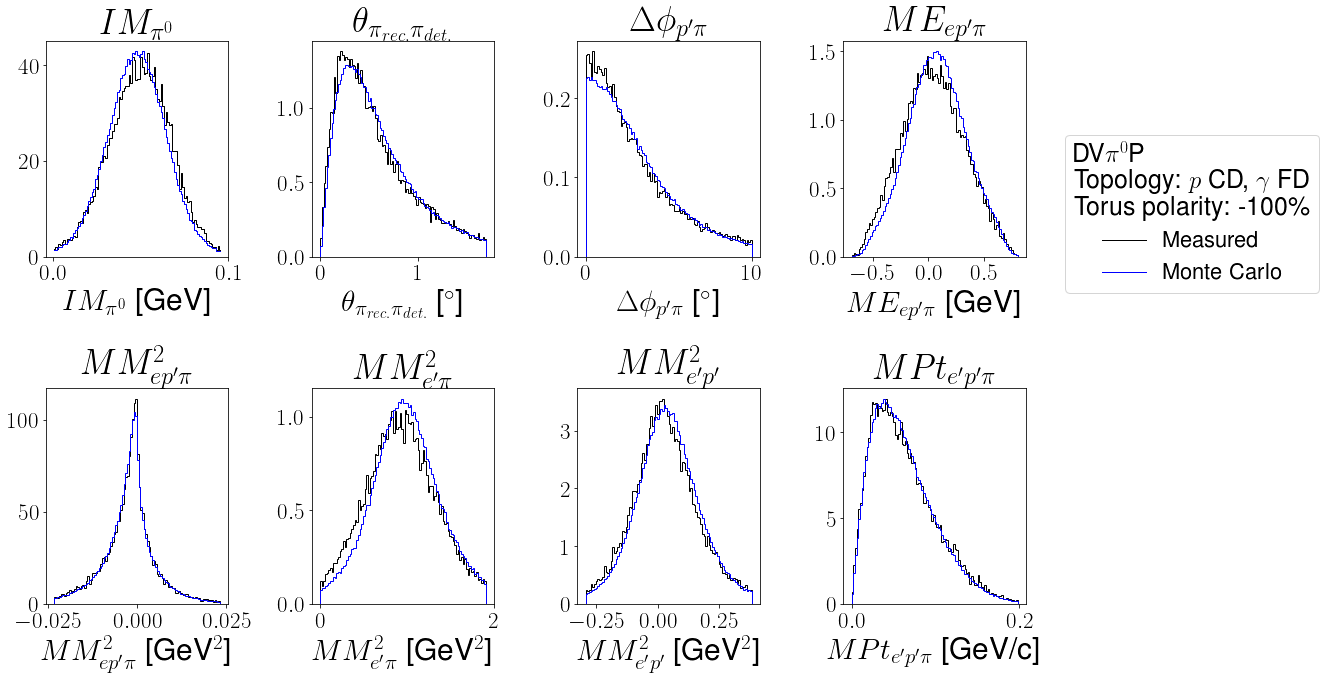

In [94]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbCD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbCD[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

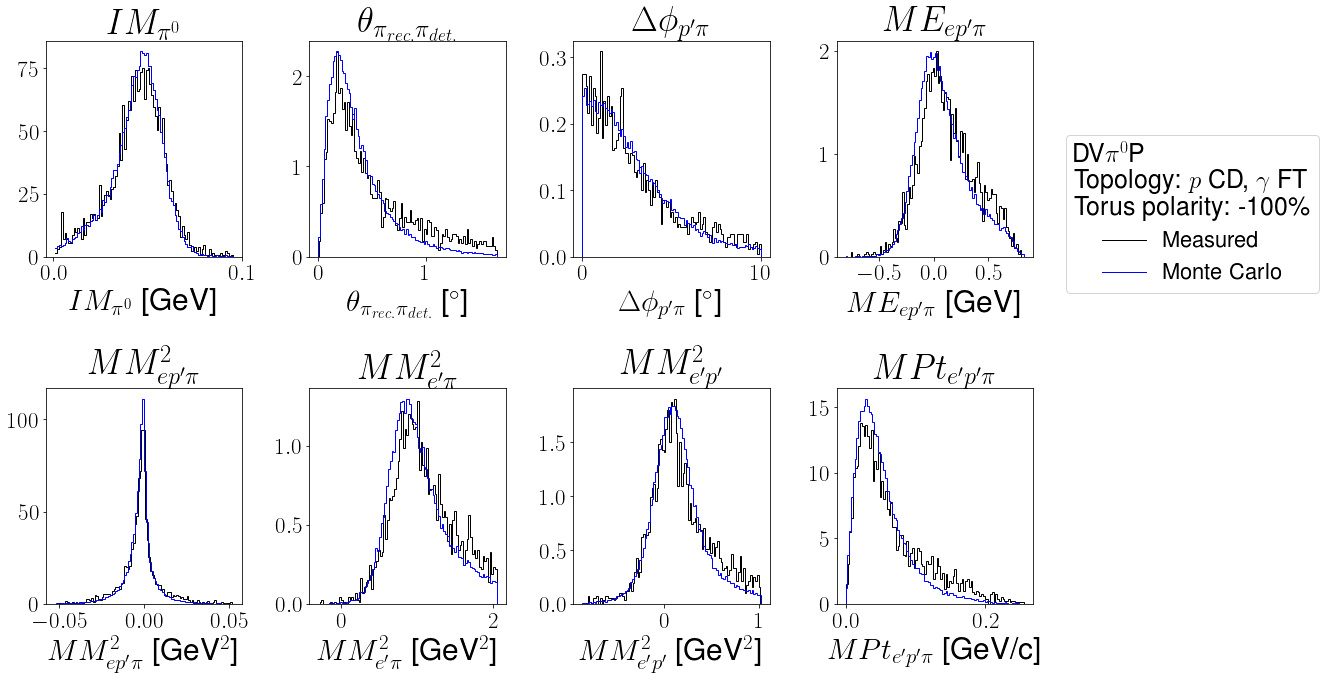

In [95]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbCDFT[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbCDFT[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()

In [67]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [104]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [105]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)& (pi0SimOutb.Pp < 0.8)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)& (pi0SimOutb.Pp < 0.8)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)& (pi0SimOutb.Pp < 0.8)]

In [74]:
contOutbCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contOutbFD = len(pi0ExpOutbFD)*len(bkgSimOutbFD)/len(pi0SimOutbFD)/len(epgExpOutbFD)
contOutbCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)
contOutb = len(pi0ExpOutb)*len(bkgSimOutb)/len(pi0SimOutb)/len(epgExpOutb)

NameError: name 'pi0ExpOutbCD' is not defined

In [135]:
print(len(epgExpOutbFD), len(epgExpOutbCD), len(epgExpOutbCDFT))

21430 195337 99248


In [138]:
print(len(pi0ExpOutbFD), len(pi0ExpOutbCD), len(pi0ExpOutbCDFT))

16355 92290 3679


In [136]:
print(contFD, contCD, contCDFT)

0.36713939417596103 0.1405417865774775 0.004050229443471066


coneAngle 30.58613314344562
reconGam 0.8116975344467025
coplanarity 3.6653792532306726
ME_epg 0.23779736792490697
MM2_epg -0.0026739540800400675
MM2_eg 1.1734146463312947
MM2_ep 0.025854886499475326
MPt 0.09947564877174819


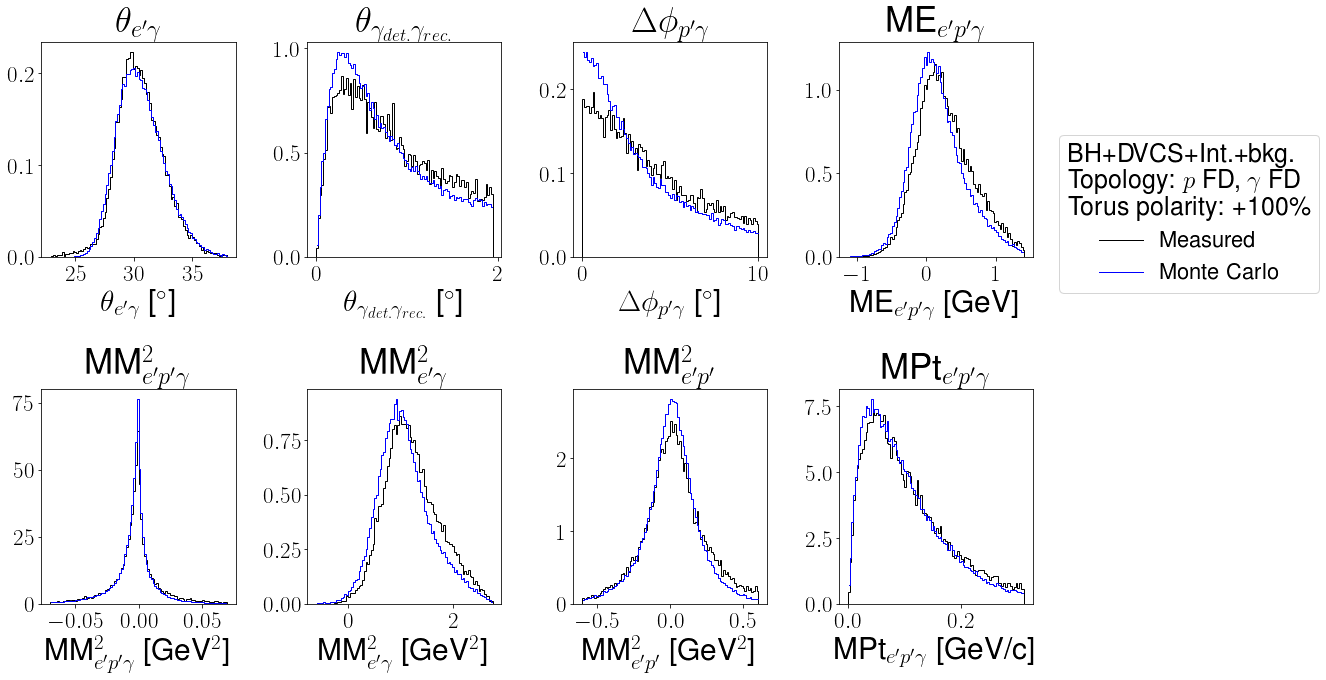

<Figure size 648x432 with 0 Axes>

In [132]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpOutbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbFD)/len(pi0SimOutbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

coneAngle 21.681460573403587
reconGam 0.35064252965413445
coplanarity 2.0700143426272875
ME_epg 0.03485877515557449
MM2_epg -0.001346973458657583
MM2_eg 0.9375528302463764
MM2_ep 0.023357936687978594
MPt 0.051092640646295547


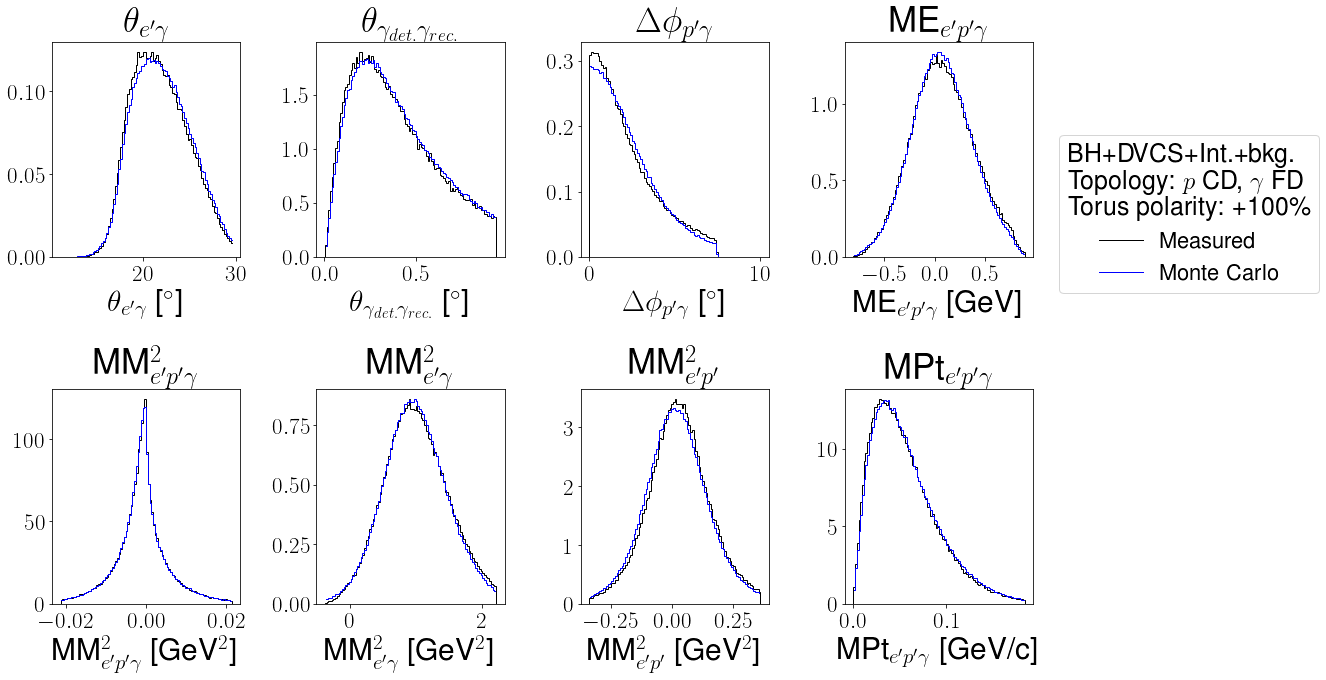

<Figure size 648x432 with 0 Axes>

In [133]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

coneAngle 21.81134458104549
reconGam 0.2743223355033698
coplanarity 2.321585265416945
ME_epg 0.004687257269115258
MM2_epg -0.0020416939924948257
MM2_eg 0.9015496364438439
MM2_ep 0.04999396348883583
MPt 0.03604095833518417


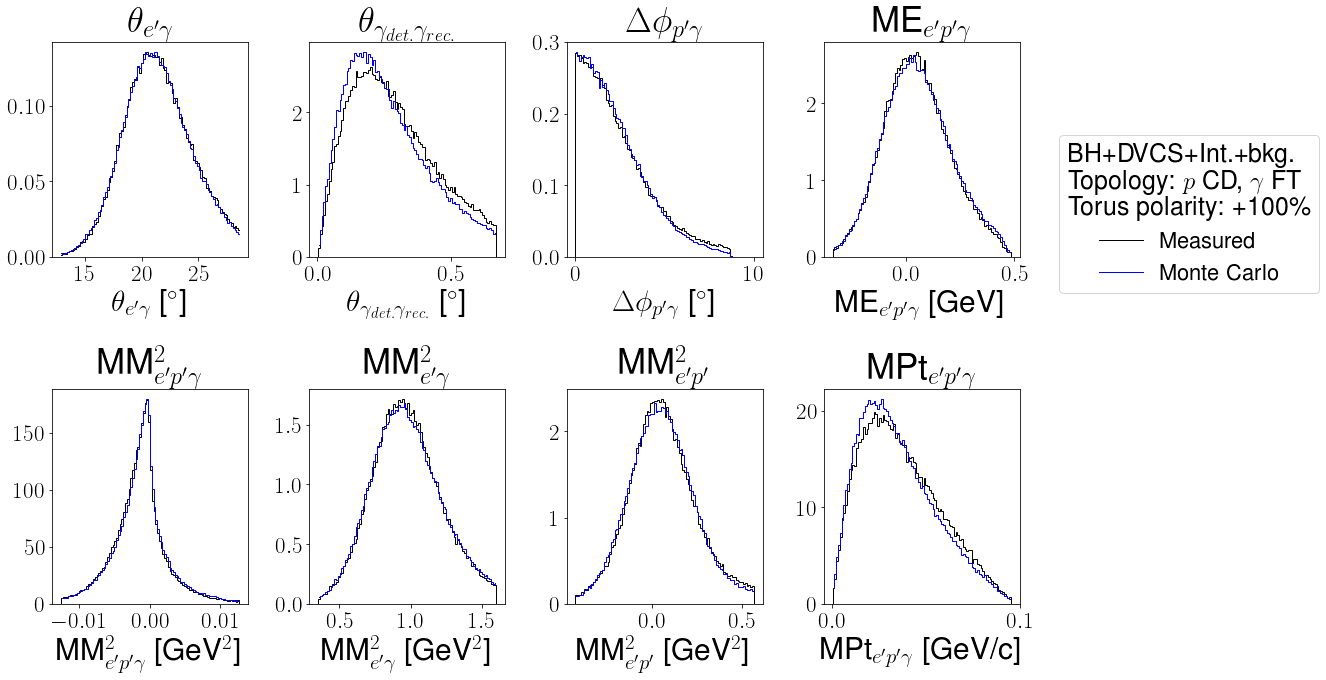

<Figure size 648x432 with 0 Axes>

In [134]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCDFT)/len(pi0SimOutbCDFT)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

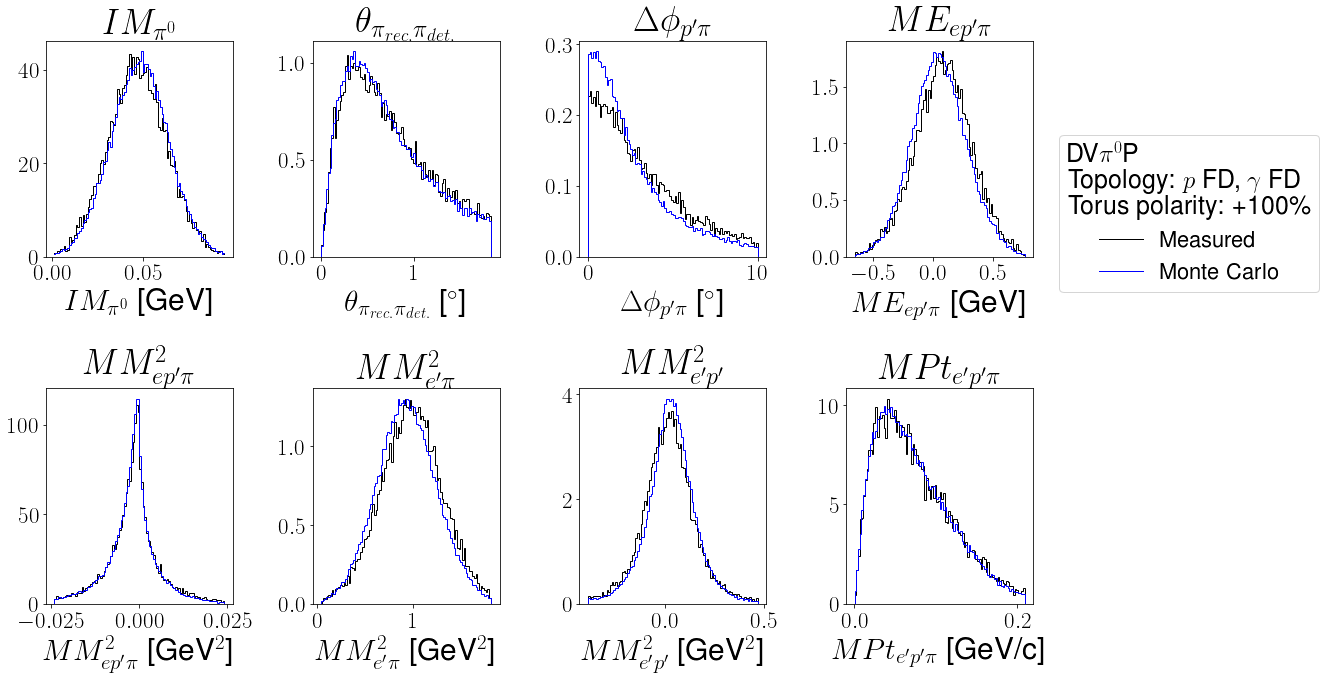

In [110]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimOutbFD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpOutbFD[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()

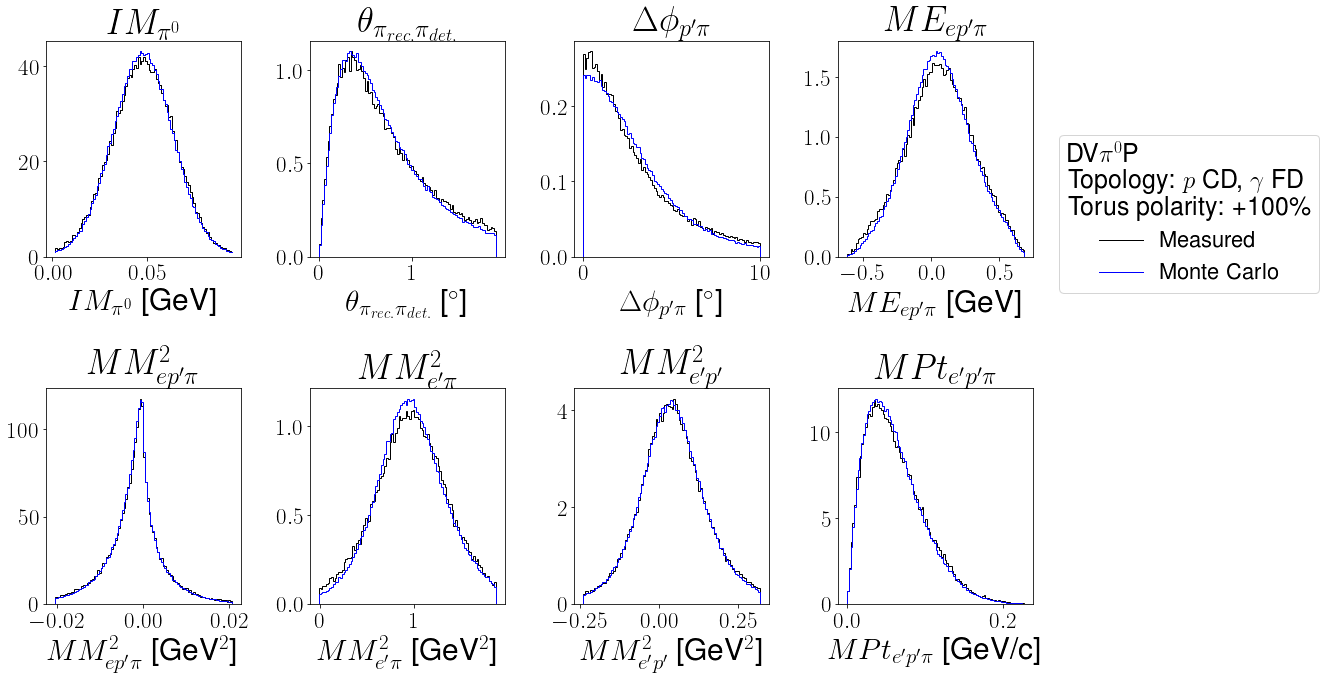

In [111]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimOutbCD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpOutbCD[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()

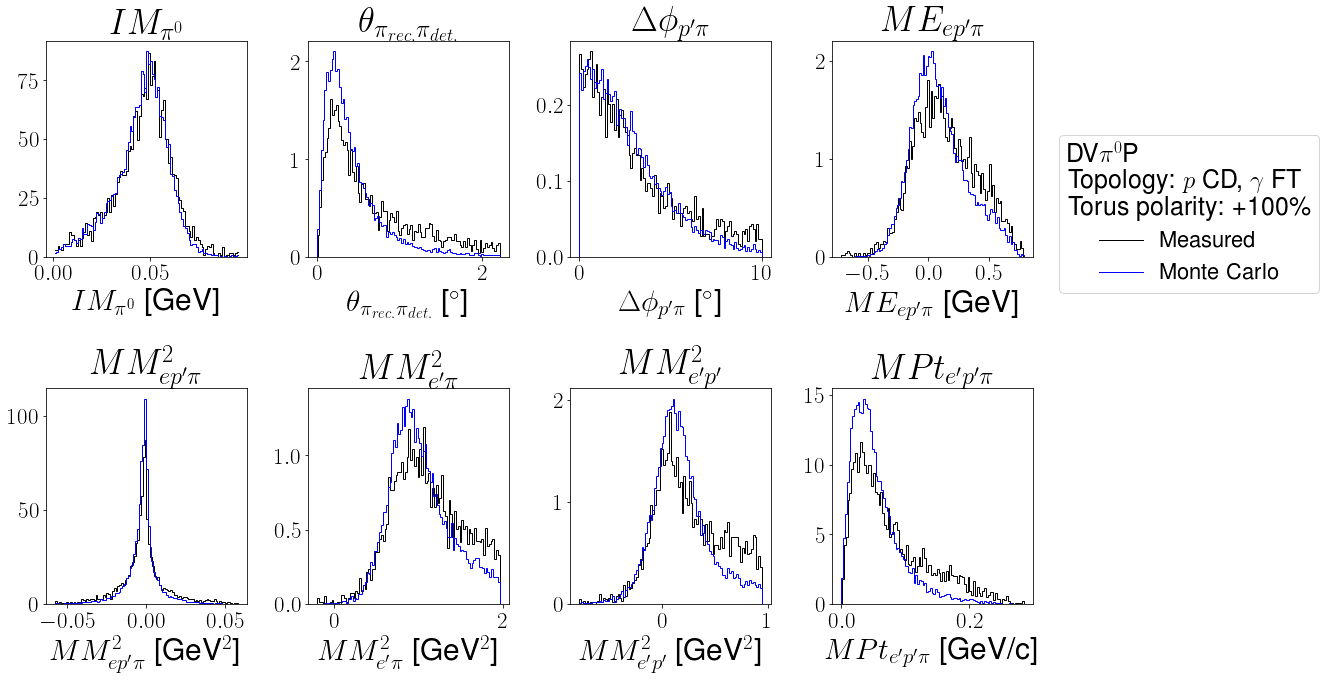

In [112]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimOutbCDFT[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpOutbCDFT[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: +100\%")
plt.show()

In [143]:
len(epgExpInb.loc[epgExpInb.t2<0.55, :])+len(epgExpOutb.loc[epgExpOutb.t2<0.55, :])

525149